In [5]:
%pylab inline
from scipy import integrate
from matplotlib.legend_handler import HandlerLine2D
from scipy import integrate
from mpl_toolkits.axes_grid1 import AxesGrid
import yt
from yt.mods import *
yt.funcs.mylog.setLevel(50) #coerce output null

Populating the interactive namespace from numpy and matplotlib


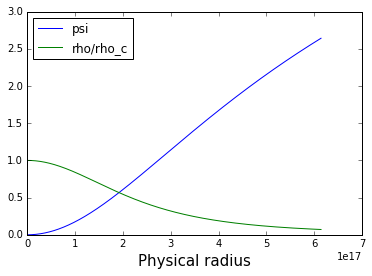

In [3]:
xi_max = 6.451
from scipy import integrate
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
plt.plot(r,asol[:,0],label ='psi')#$\psi$' )
plt.plot(r,rho,label ='rho/rho_c')#$\rho$')
plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)

In the FC sphere that I evolved with FLASH for 6tff I used a rmax =6.41

In [13]:
1/rho[641]

13.8272032312771

In [14]:
shape(rho)

(700,)

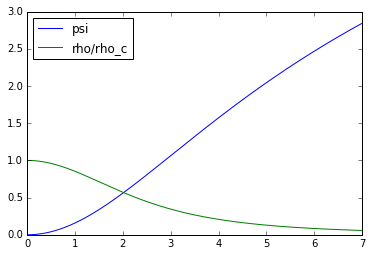

In [6]:
xi_max = 7.0
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho =  np.exp(-asol[:,0]) 
r = xi/1.05e-17 #[cm]
plt.plot(xi,asol[:,0],label ='psi')#$\psi$' )
plt.plot(xi,rho,label ='rho/rho_c')#$\rho$')
# plt.xlabel("Physical radius",fontsize=15)
from matplotlib.legend_handler import HandlerLine2D
plt.legend(loc='upper left',prop={'size':12},numpoints=1)
# np.savetxt("../patch/hydro/isothermal_sphere/density.txt",rho)

In [24]:
cd ~/project/FLASH4.3_2/object/fc_sphere_small_rho_6tff/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object/fc_sphere_small_rho_6tff


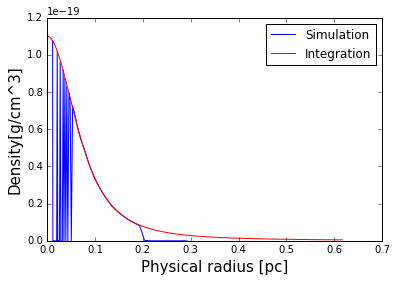

In [88]:
i =1
rho_c = 1.1E-19
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
plt.figure()
sp = pf.sphere(pf.domain_center, (0.30,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 20.0
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

In [50]:
shape(rho)

(2000,)

In [51]:
rho_txt = np.loadtxt("../../density.txt")

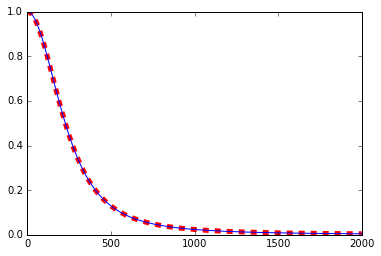

In [57]:
plt.plot(rho,'--',color="red",linewidth=5)
plt.plot(rho_txt)

In [90]:
shape(rho)

(2000,)

In [91]:
d_ratio = 1.0/rho
d_ratio[np.where(d_ratio<20)[0]][-1]

19.963728865699053

In [92]:
np.where(d_ratio<20)[0][-1]

744

In [93]:
d_ratio[646]

14.091107794349936

In [94]:
np.where(d_ratio<20)[0][-1]

744

In [96]:
d_ratio[745]

20.030667873735172

In [146]:
cd ..

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


yt : [INFO     ] 2016-03-29 22:08:01,909 integer runtime parameter iprocs overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-03-29 22:08:01,910 integer runtime parameter jprocs overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-03-29 22:08:01,910 integer runtime parameter kprocs overwrites a simulation scalar of the same name
yt : [INFO     ] 2016-03-29 22:08:01,922 Parameters: current_time              = 0.0
yt : [INFO     ] 2016-03-29 22:08:01,923 Parameters: domain_dimensions         = [8 8 8]
yt : [INFO     ] 2016-03-29 22:08:01,924 Parameters: domain_left_edge          = [ 0.  0.  0.]
yt : [INFO     ] 2016-03-29 22:08:01,925 Parameters: domain_right_edge         = [  5.00000000e+18   5.00000000e+18   5.00000000e+18]
yt : [INFO     ] 2016-03-29 22:08:01,925 Parameters: cosmological_simulation   = 0.0
yt : [INFO     ] 2016-03-29 22:08:02,080 Loading field plugins.
yt : [INFO     ] 2016-03-29 22:08:02,081 Loaded angular_momentum (8 new fields)
yt

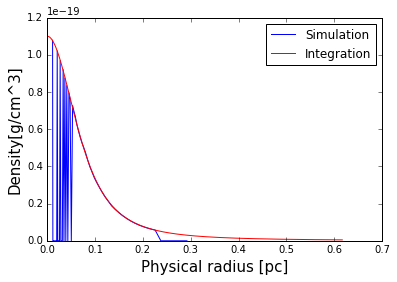

In [147]:
i =0
rho_c = 1.1E-19
# pf= yt.load("output_{0}/info_{0}.txt".format(str(timestep).zfill(5)))
pf = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
plt.figure()
sp = pf.sphere(pf.domain_center, (0.30,"pc"))
rp = yt.create_profile(sp,'radius','density')#,units={'radius':'pc'},logs={'radius':False})
plt.plot(rp.x.value*3.24077929e-19,rp["density"].in_units("g/cm**3").value,label="Simulation")
xi_max = 20.0
def solvr(Y, t):
    return [Y[1], exp(-Y[0])-2/t*Y[1]]
xi = np.arange(1e-6, xi_max, 0.01) #start at small poisitive number to avoid div-by-0
asol = integrate.odeint(solvr, [0, 0], xi)
rho = np.exp(-asol[:,0]) #rho/rho_c
r = xi/1.05e-17 #[cm]
#1cm = 3.24077929e-19 Parsecs
plt.plot(r*3.24077929e-19,rho*rho_c,label ='Integration',color="red")#$\rho$')
plt.xlabel("Physical radius [pc]",fontsize=15)
plt.ylabel("Density[g/cm^3]",fontsize=15)
plt.legend(loc='upper right',prop={'size':12},numpoints=1)

In [148]:
sim_rho = rp["density"].in_units("g/cm**3").value

In [149]:
min(sim_rho[np.where(sim_rho>1e-26)[0]])

5.7765544645315567e-21

In [150]:
1.10e-19*rho[745]

5.4915792470522352e-21

In [151]:
# sim_rho[np.where(sim_rho>1e-26)[0]]

In [152]:
idx=np.where(1.1e-19/sim_rho>20)[0]

In [153]:
sim_rho[idx]

array([  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
         0.00000000e+00,   7.98560000e-27,   7.98560000e-27,
         7.98560000e-27,   7.98560000e-27,   7.98560000e-27])

In [159]:
1.1e-19/5.776e-21

19.04432132963989

In [161]:
rho_out=8e-27
1.1e-19/sim_rho[np.where(sim_rho>rho_out)[0][-1]]

19.042493354024028

In [22]:
cd ~/project/FLASH4.3_2/object/

/global/project/projectdirs/astro250/doris/FLASH4.3_2/object


In [23]:
def plot_dens(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
    slc.set_zlim(physical_quantity, 5.5e-26,1.1e-19)
    slc.show()
def plot_all(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="density"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
    slc.annotate_grids()
#     slc.set_log("all", False)
    slc.set_cmap("all","rainbow")
    slc.show()

    physical_quantity="pressure"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
    slc.set_log("all", False)
    # slc.set_zlim(physical_quantity,58,60)
    slc.show()

    physical_quantity="temperature"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_cmap("all","rainbow")
    slc.set_figure_size(5)
#     slc.set_zlim(physical_quantity,58,60)
#     slc.set_log("all", False)
    slc.show()


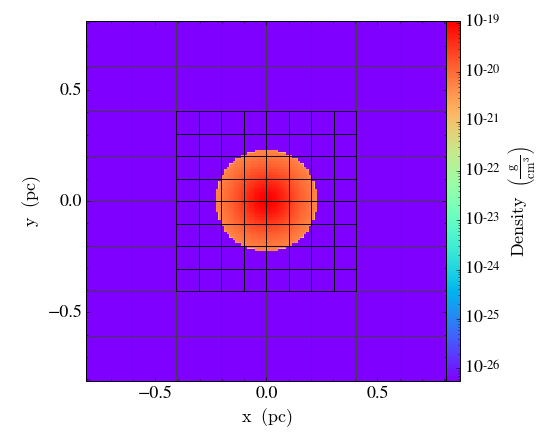


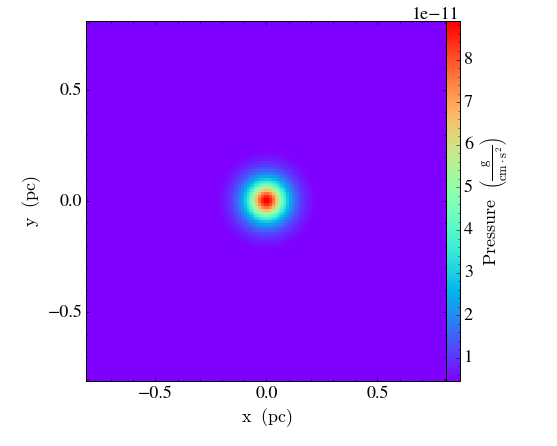


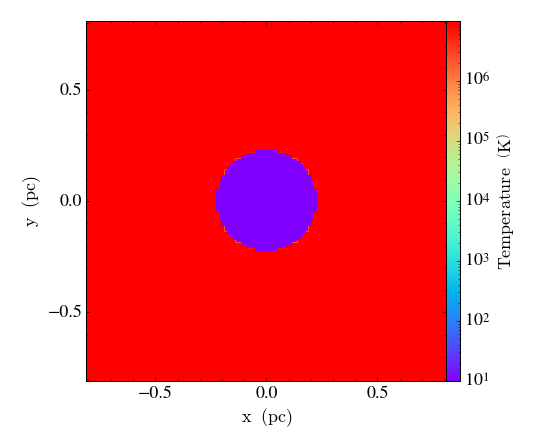

In [24]:
plot_all(0)

In [37]:
def plot_rv(i):
    ds = yt.load("sod_hdf5_chk_{}".format(str(i).zfill(4)))
    physical_quantity="radial_velocity"
    slc = yt.SlicePlot(ds, "z",physical_quantity)#,center=(0.5,0.5,0.5))
    slc.set_figure_size(5)
#     slc.annotate_grids()
    slc.annotate_velocity()
    slc.set_cmap("all","rainbow")
#     slc.set_zlim(physical_quantity, 5.5e-26,1.1e-19)
    slc.set_log("all", False)
    slc.show()


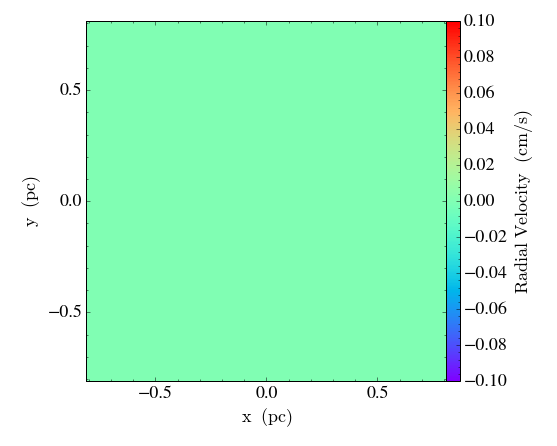


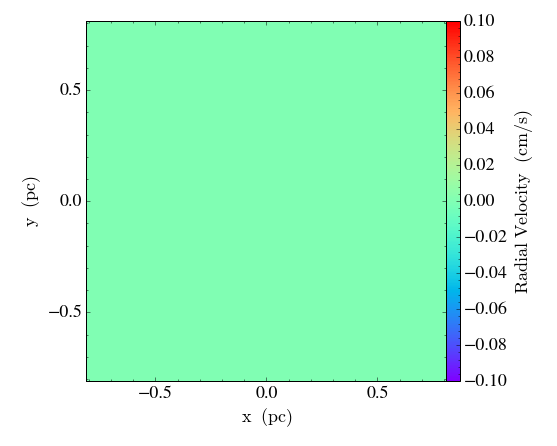


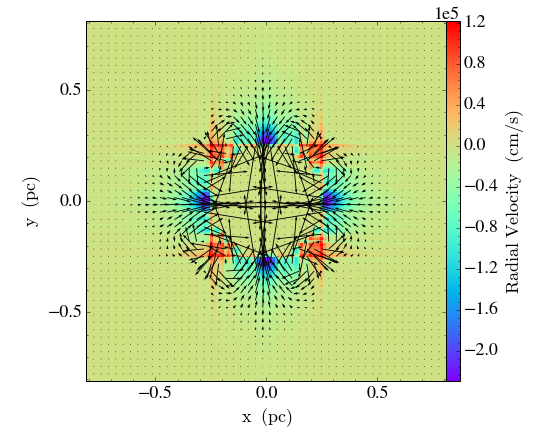


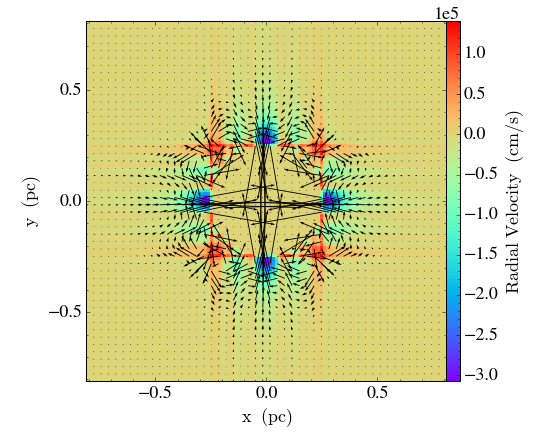


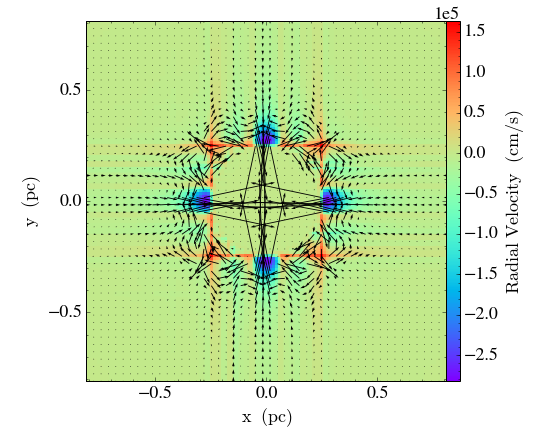


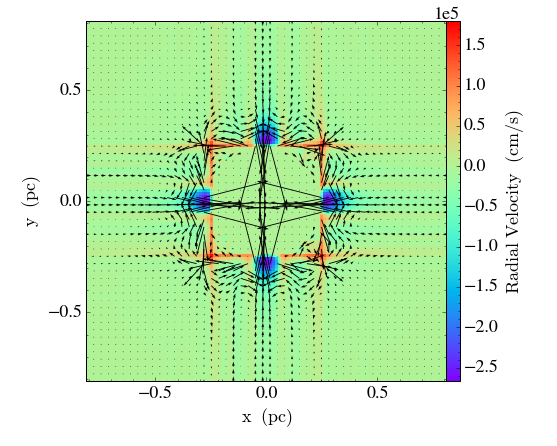


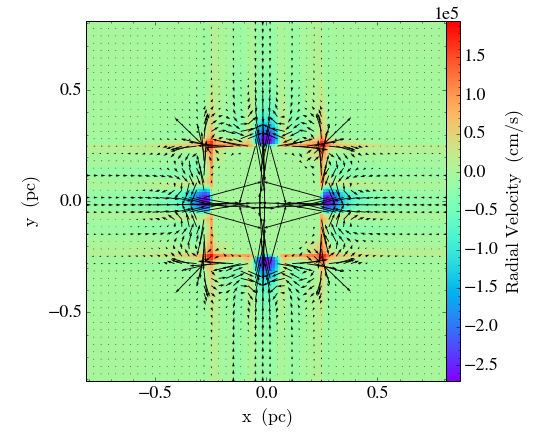


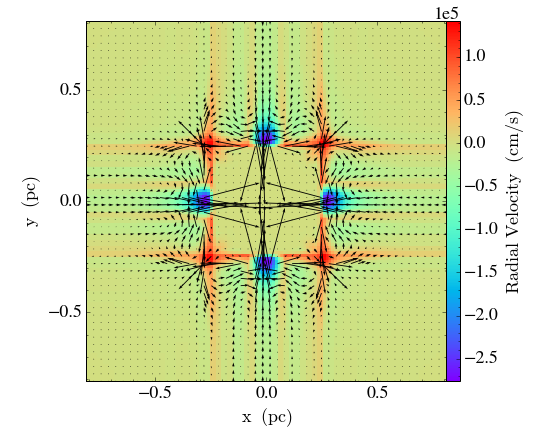


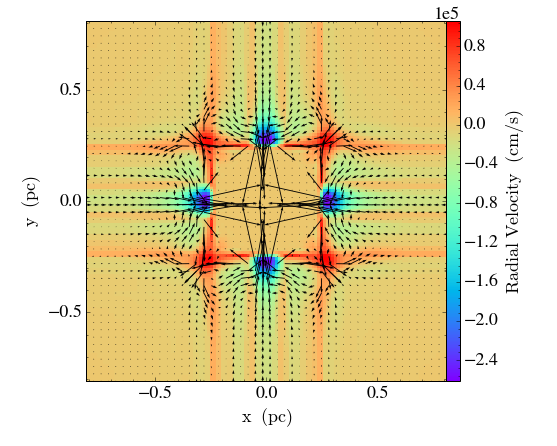


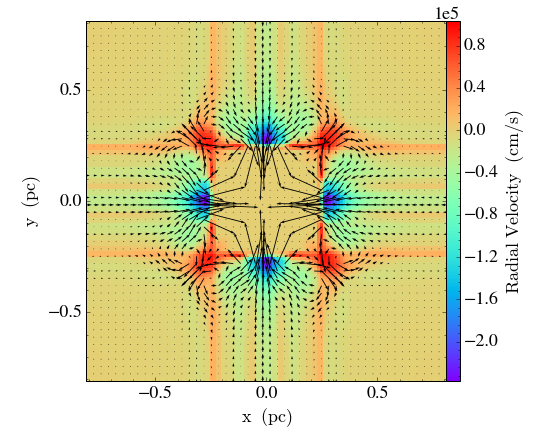


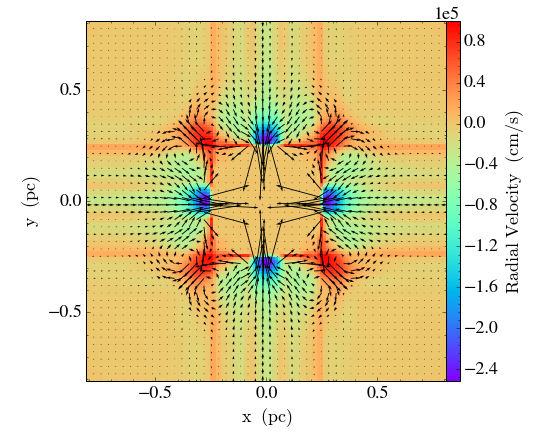


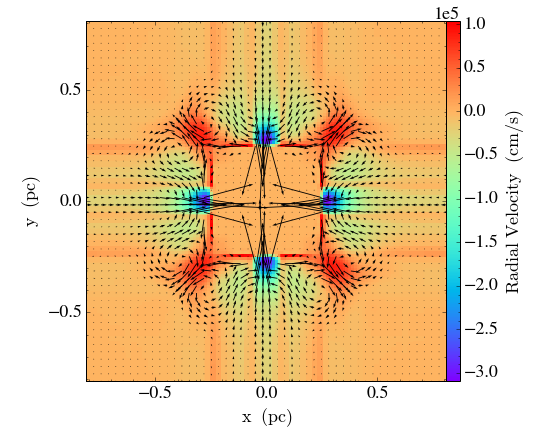


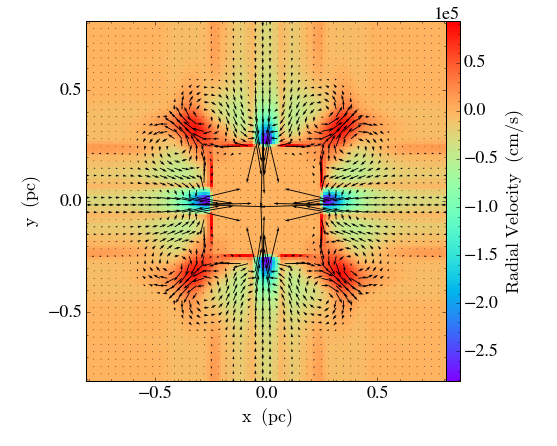


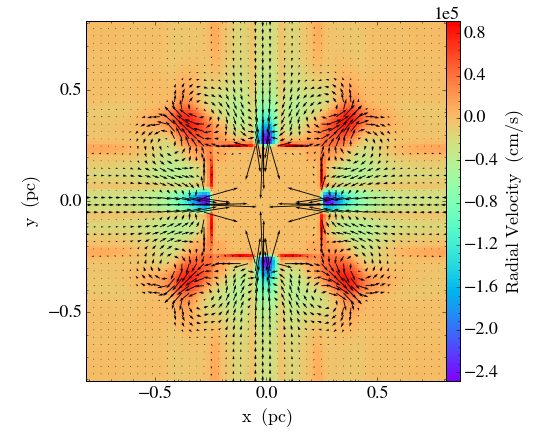


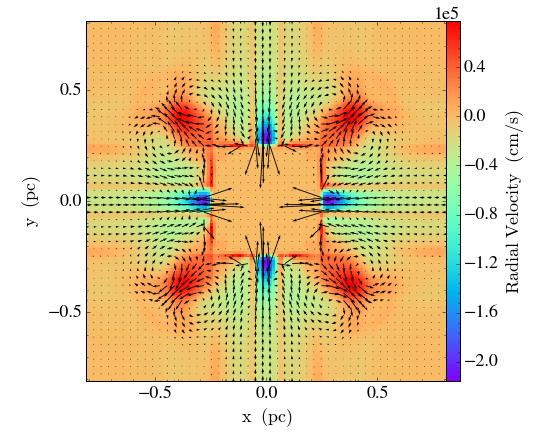


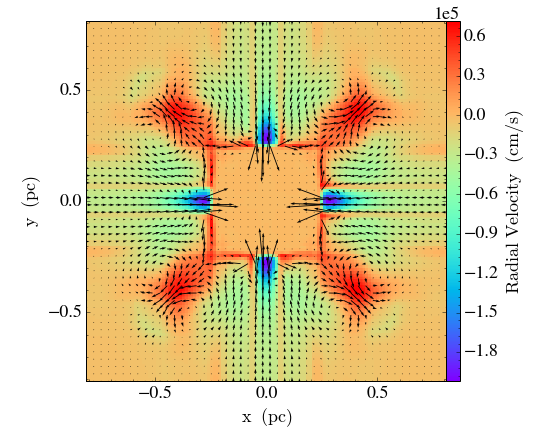


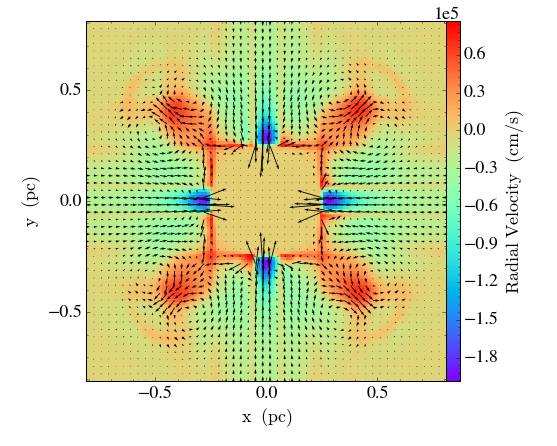


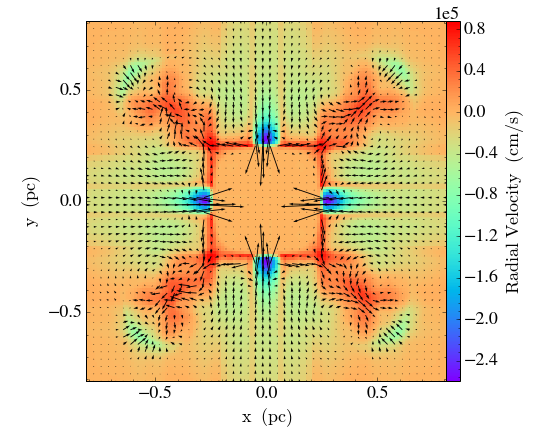


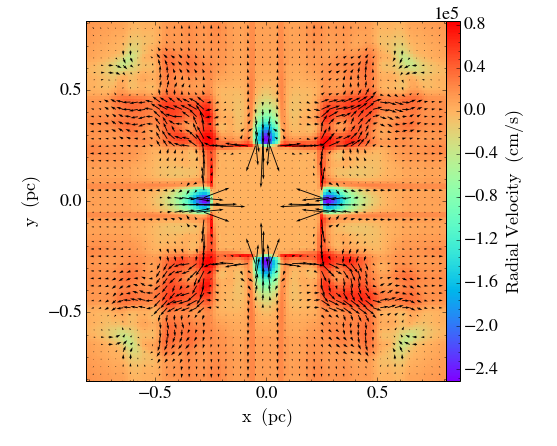


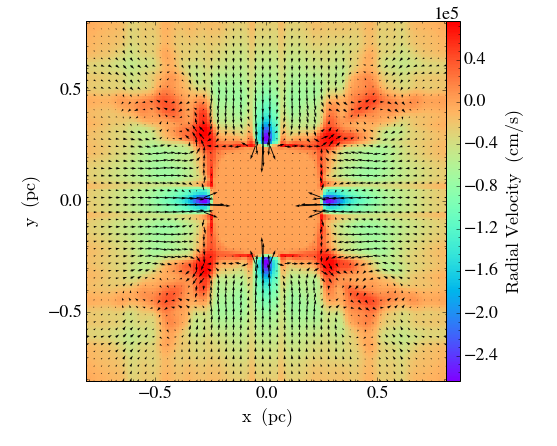


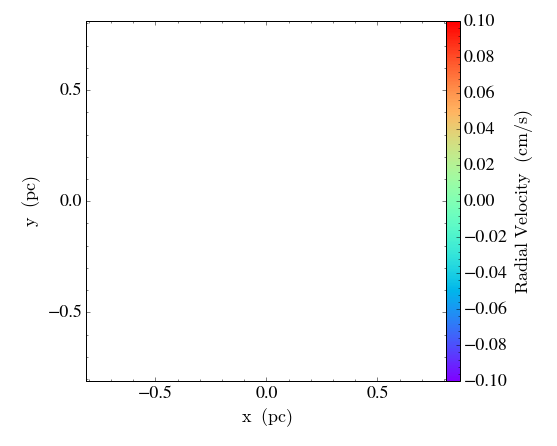


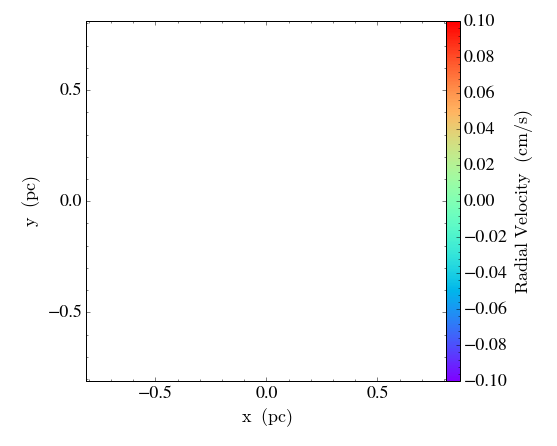

In [38]:
for i in np.arange(0,43):
    if i%2==0:
        plot_rv(i)


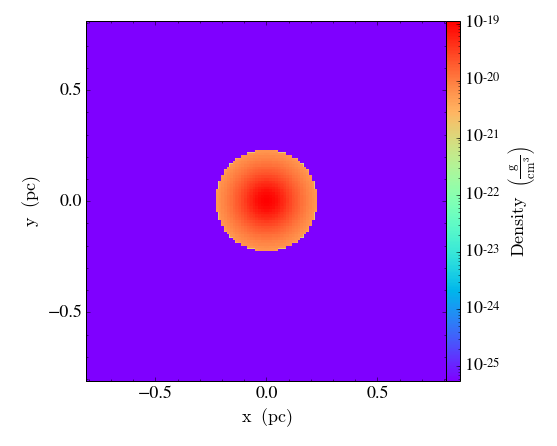


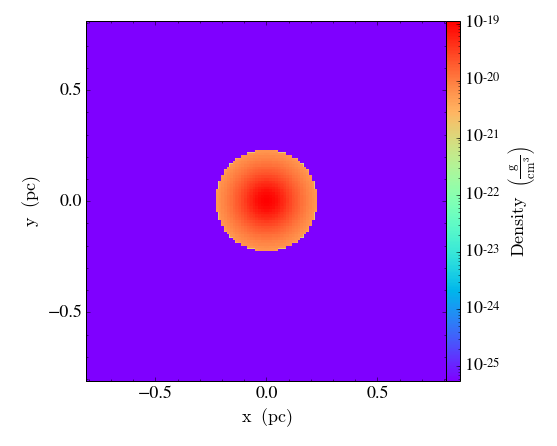


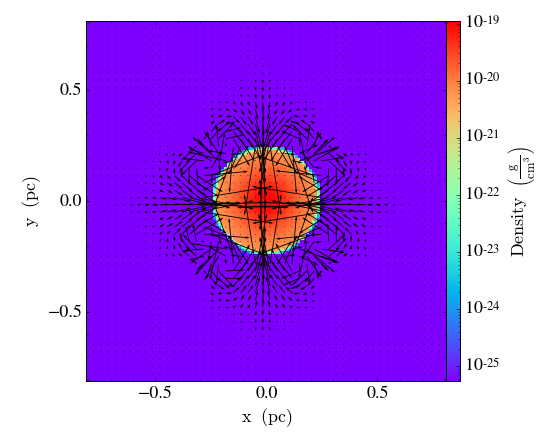


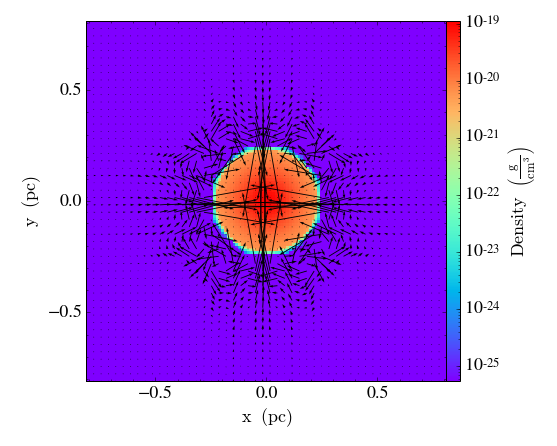


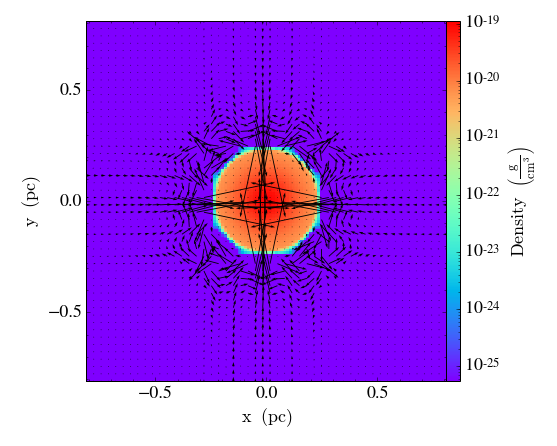


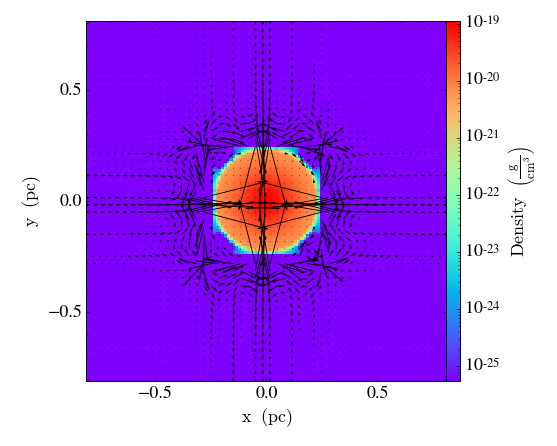


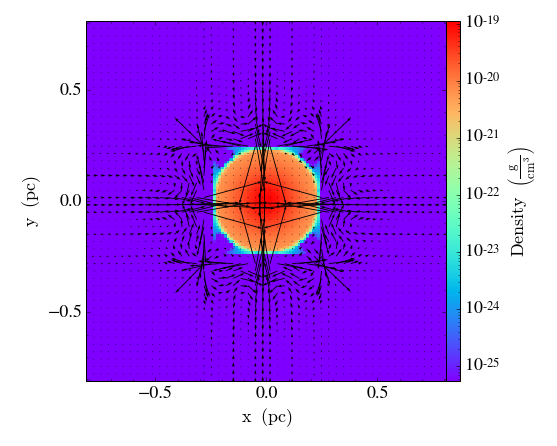


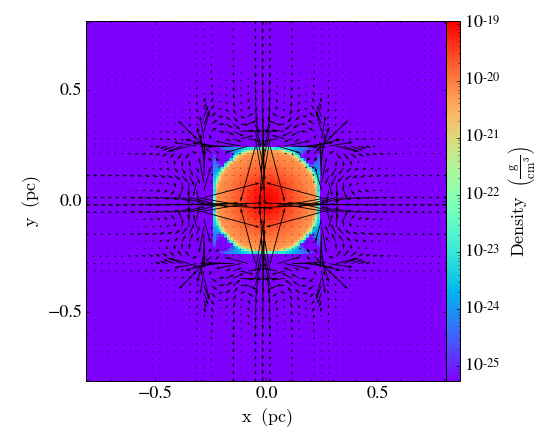


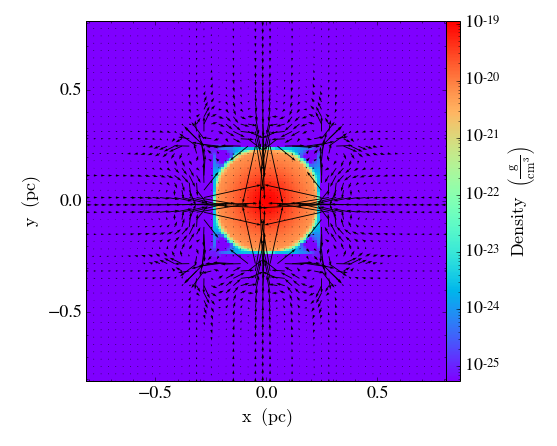


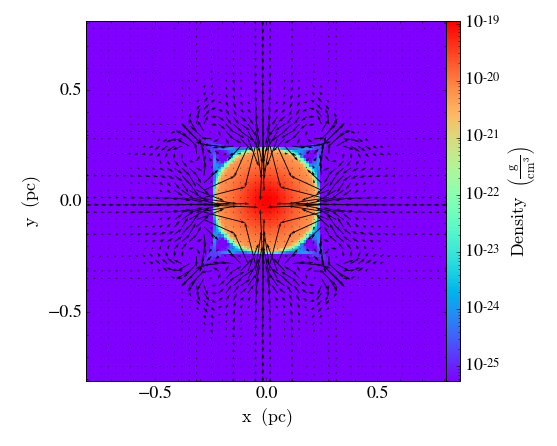


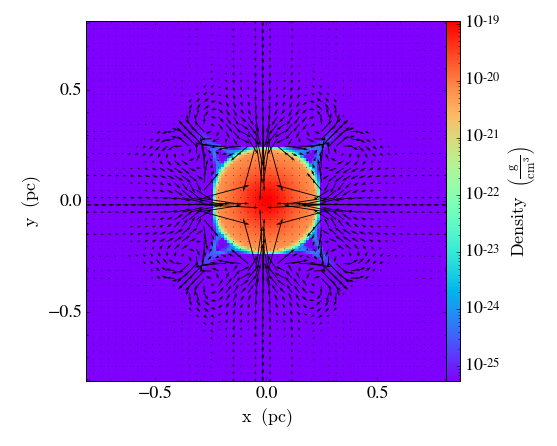


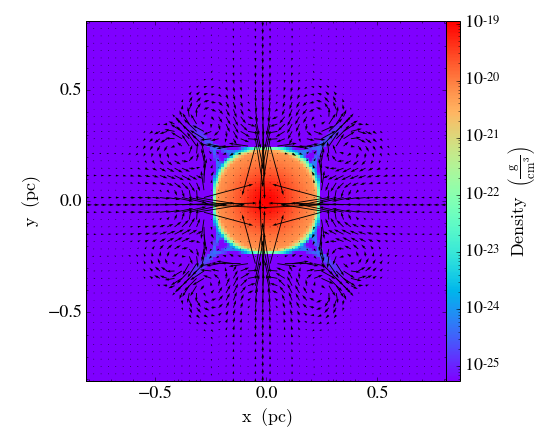


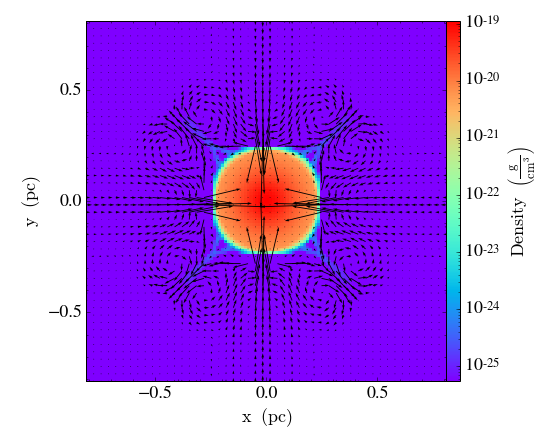


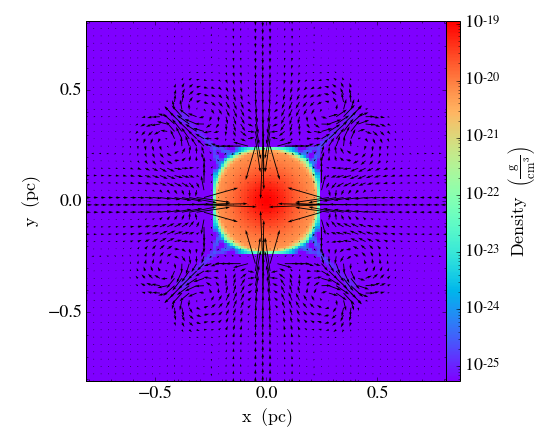


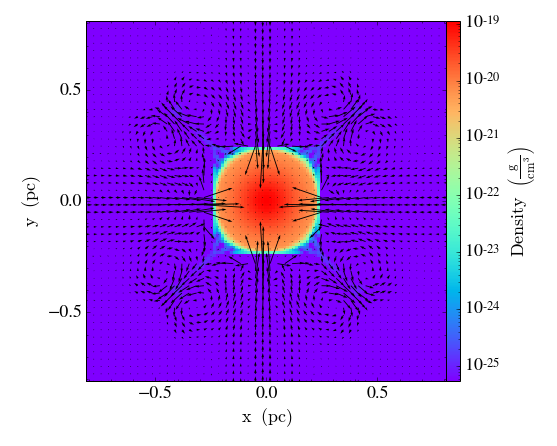


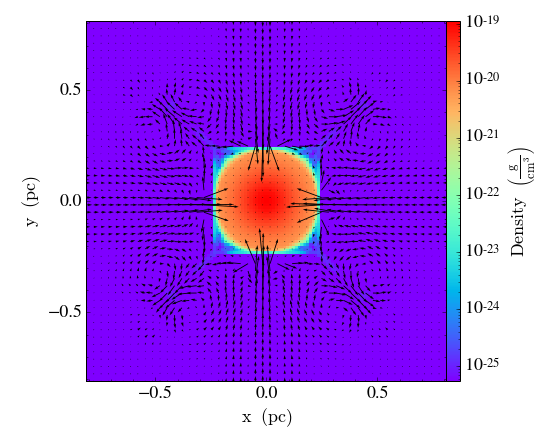


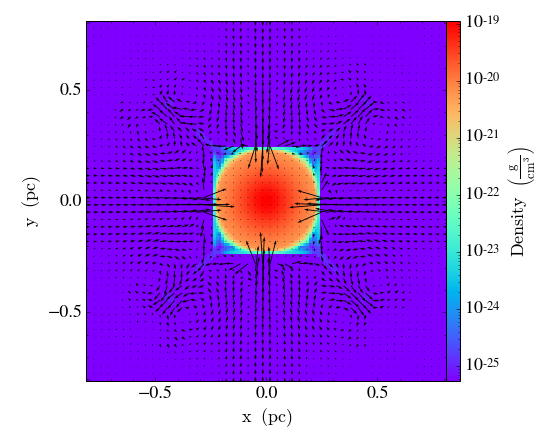


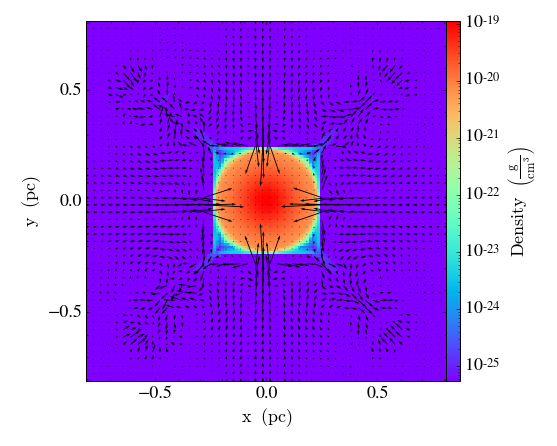


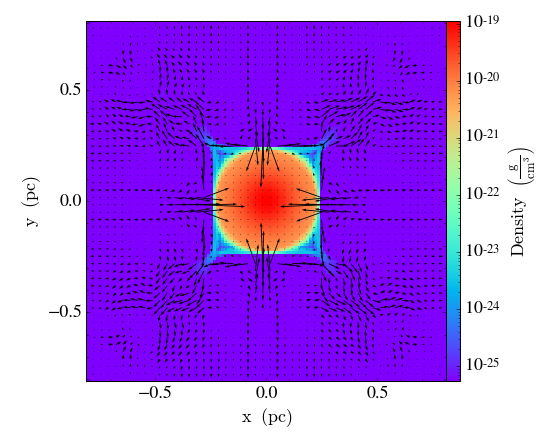


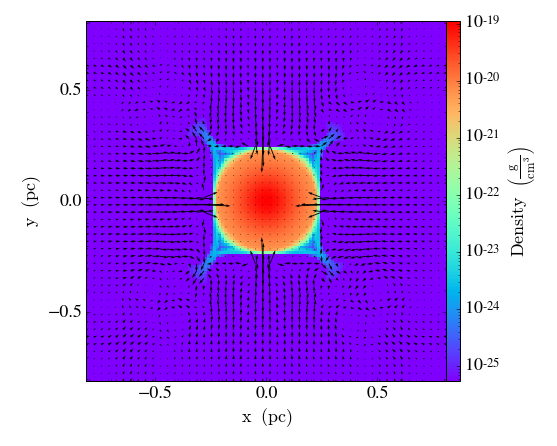


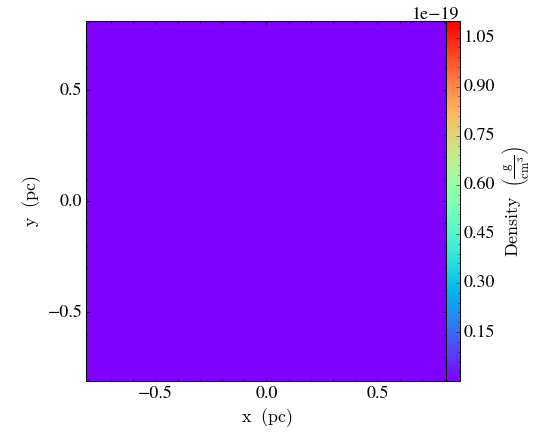


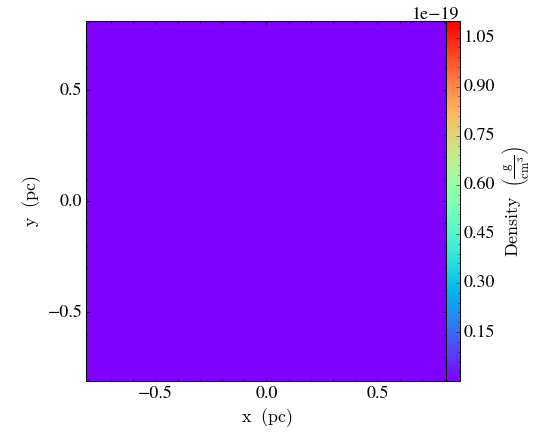

In [29]:
for i in np.arange(0,43):
    if i%2==0:
        plot_dens(i)

Not sure why the sphere dissapeared in the last two slices....

"set plotfileNumber and particleFileNumber to the number of the next plotfile and particle file you want FLASH to output.""

rho_min = 5.7765544645315567e-21

1529754.out ran for 8:23:44, then switched to 1541426.out started running 4am

5 tff reached at around 16 hrs so that's a total of 16+8=24 hrs 

In [27]:
3.5969E+13/6.33e12

5.682306477093207

In [ ]:
exiting: reached max SimTime